In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import silhouette_score,classification_report
%matplotlib inline


 In this case, sheet_name='data' is used to specify that the data should be read from the sheet named "data" in the Excel file "EastWestAirlines.xlsx".
If no sheet name is provided, by default the function reads the first sheet in the file.

In [5]:
df=pd.read_excel('F:\datasets\EastWestAirlines.xlsx',sheet_name='data',index_col=0)    
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [6]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [8]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

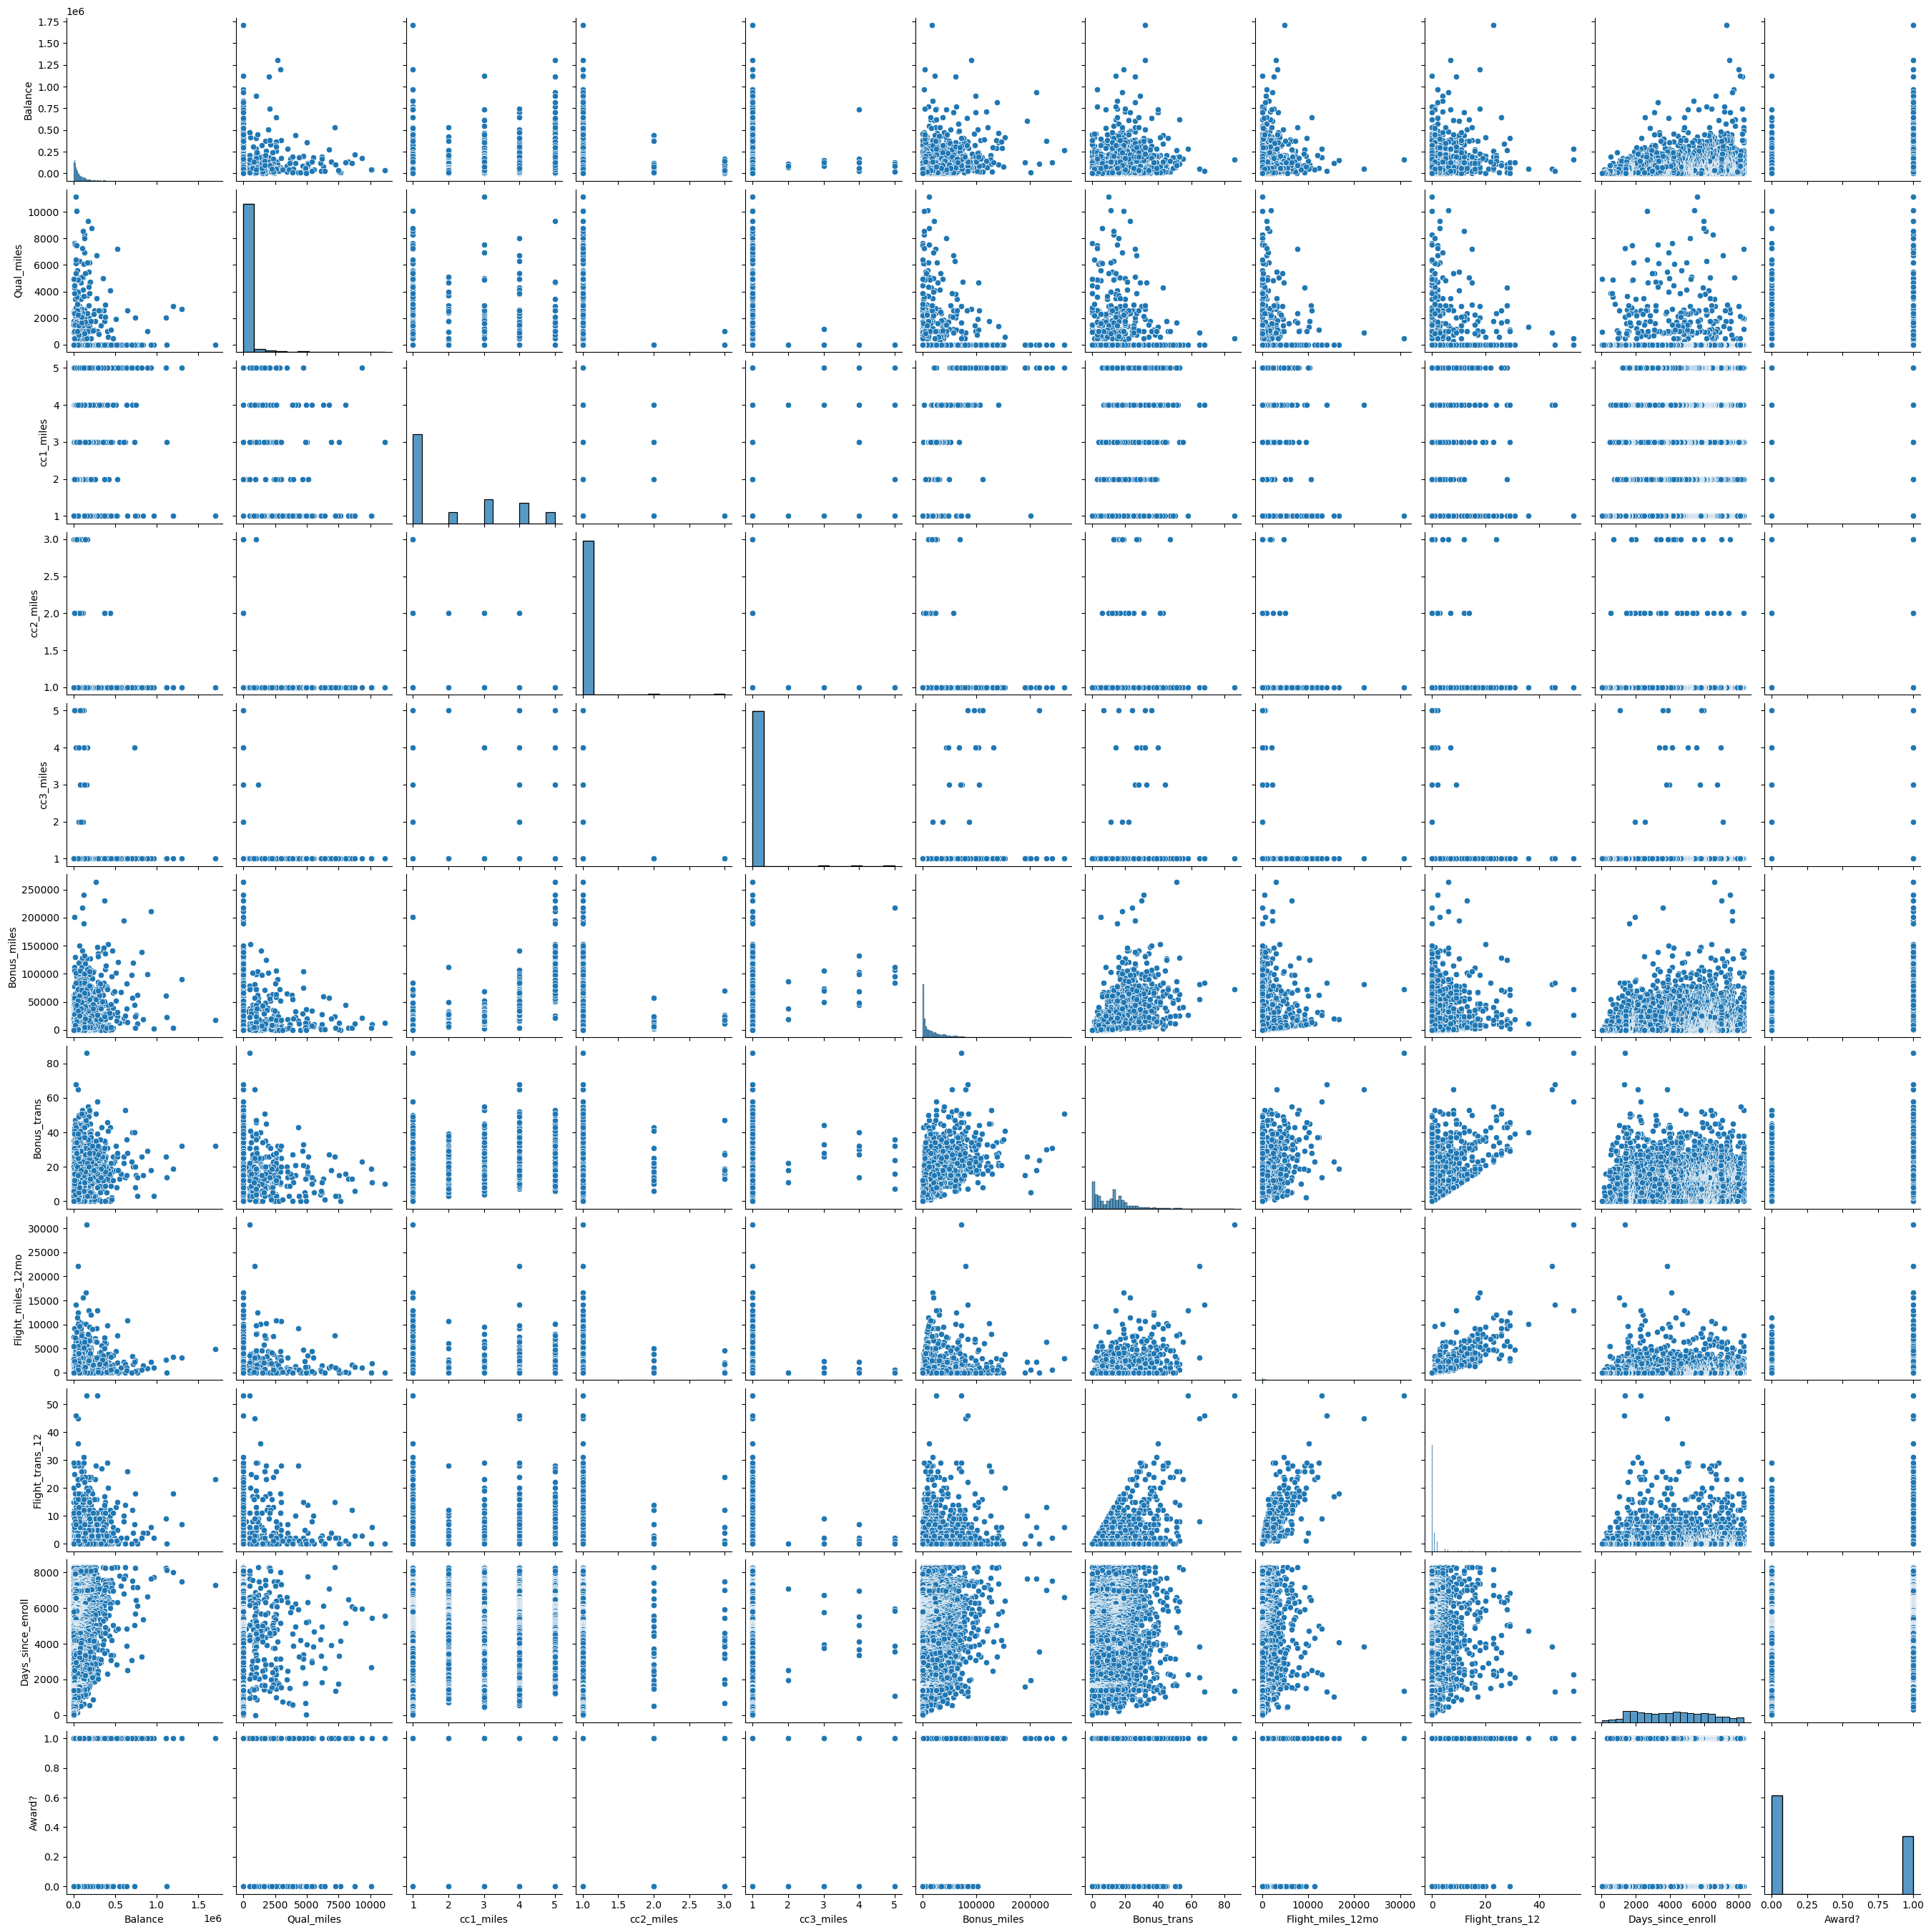

In [9]:
sns.pairplot(data=df)

In [10]:
df.rename(columns={'Award':'Award'},inplace=True)

In [11]:
x=df

In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [15]:
from scipy.cluster import hierarchy

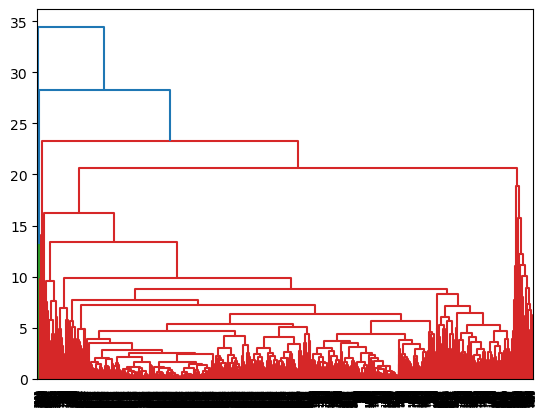

In [17]:
he=hierarchy.linkage(x,method='complete')
dedo=hierarchy.dendrogram(he)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
ag=AgglomerativeClustering(n_clusters=4)
y=ag.fit_predict(x)

In [20]:
silhouette_score(x,y)


0.30814152852022786

In [21]:
df['cluster']=y

In [22]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [23]:
x=pd.DataFrame(x)

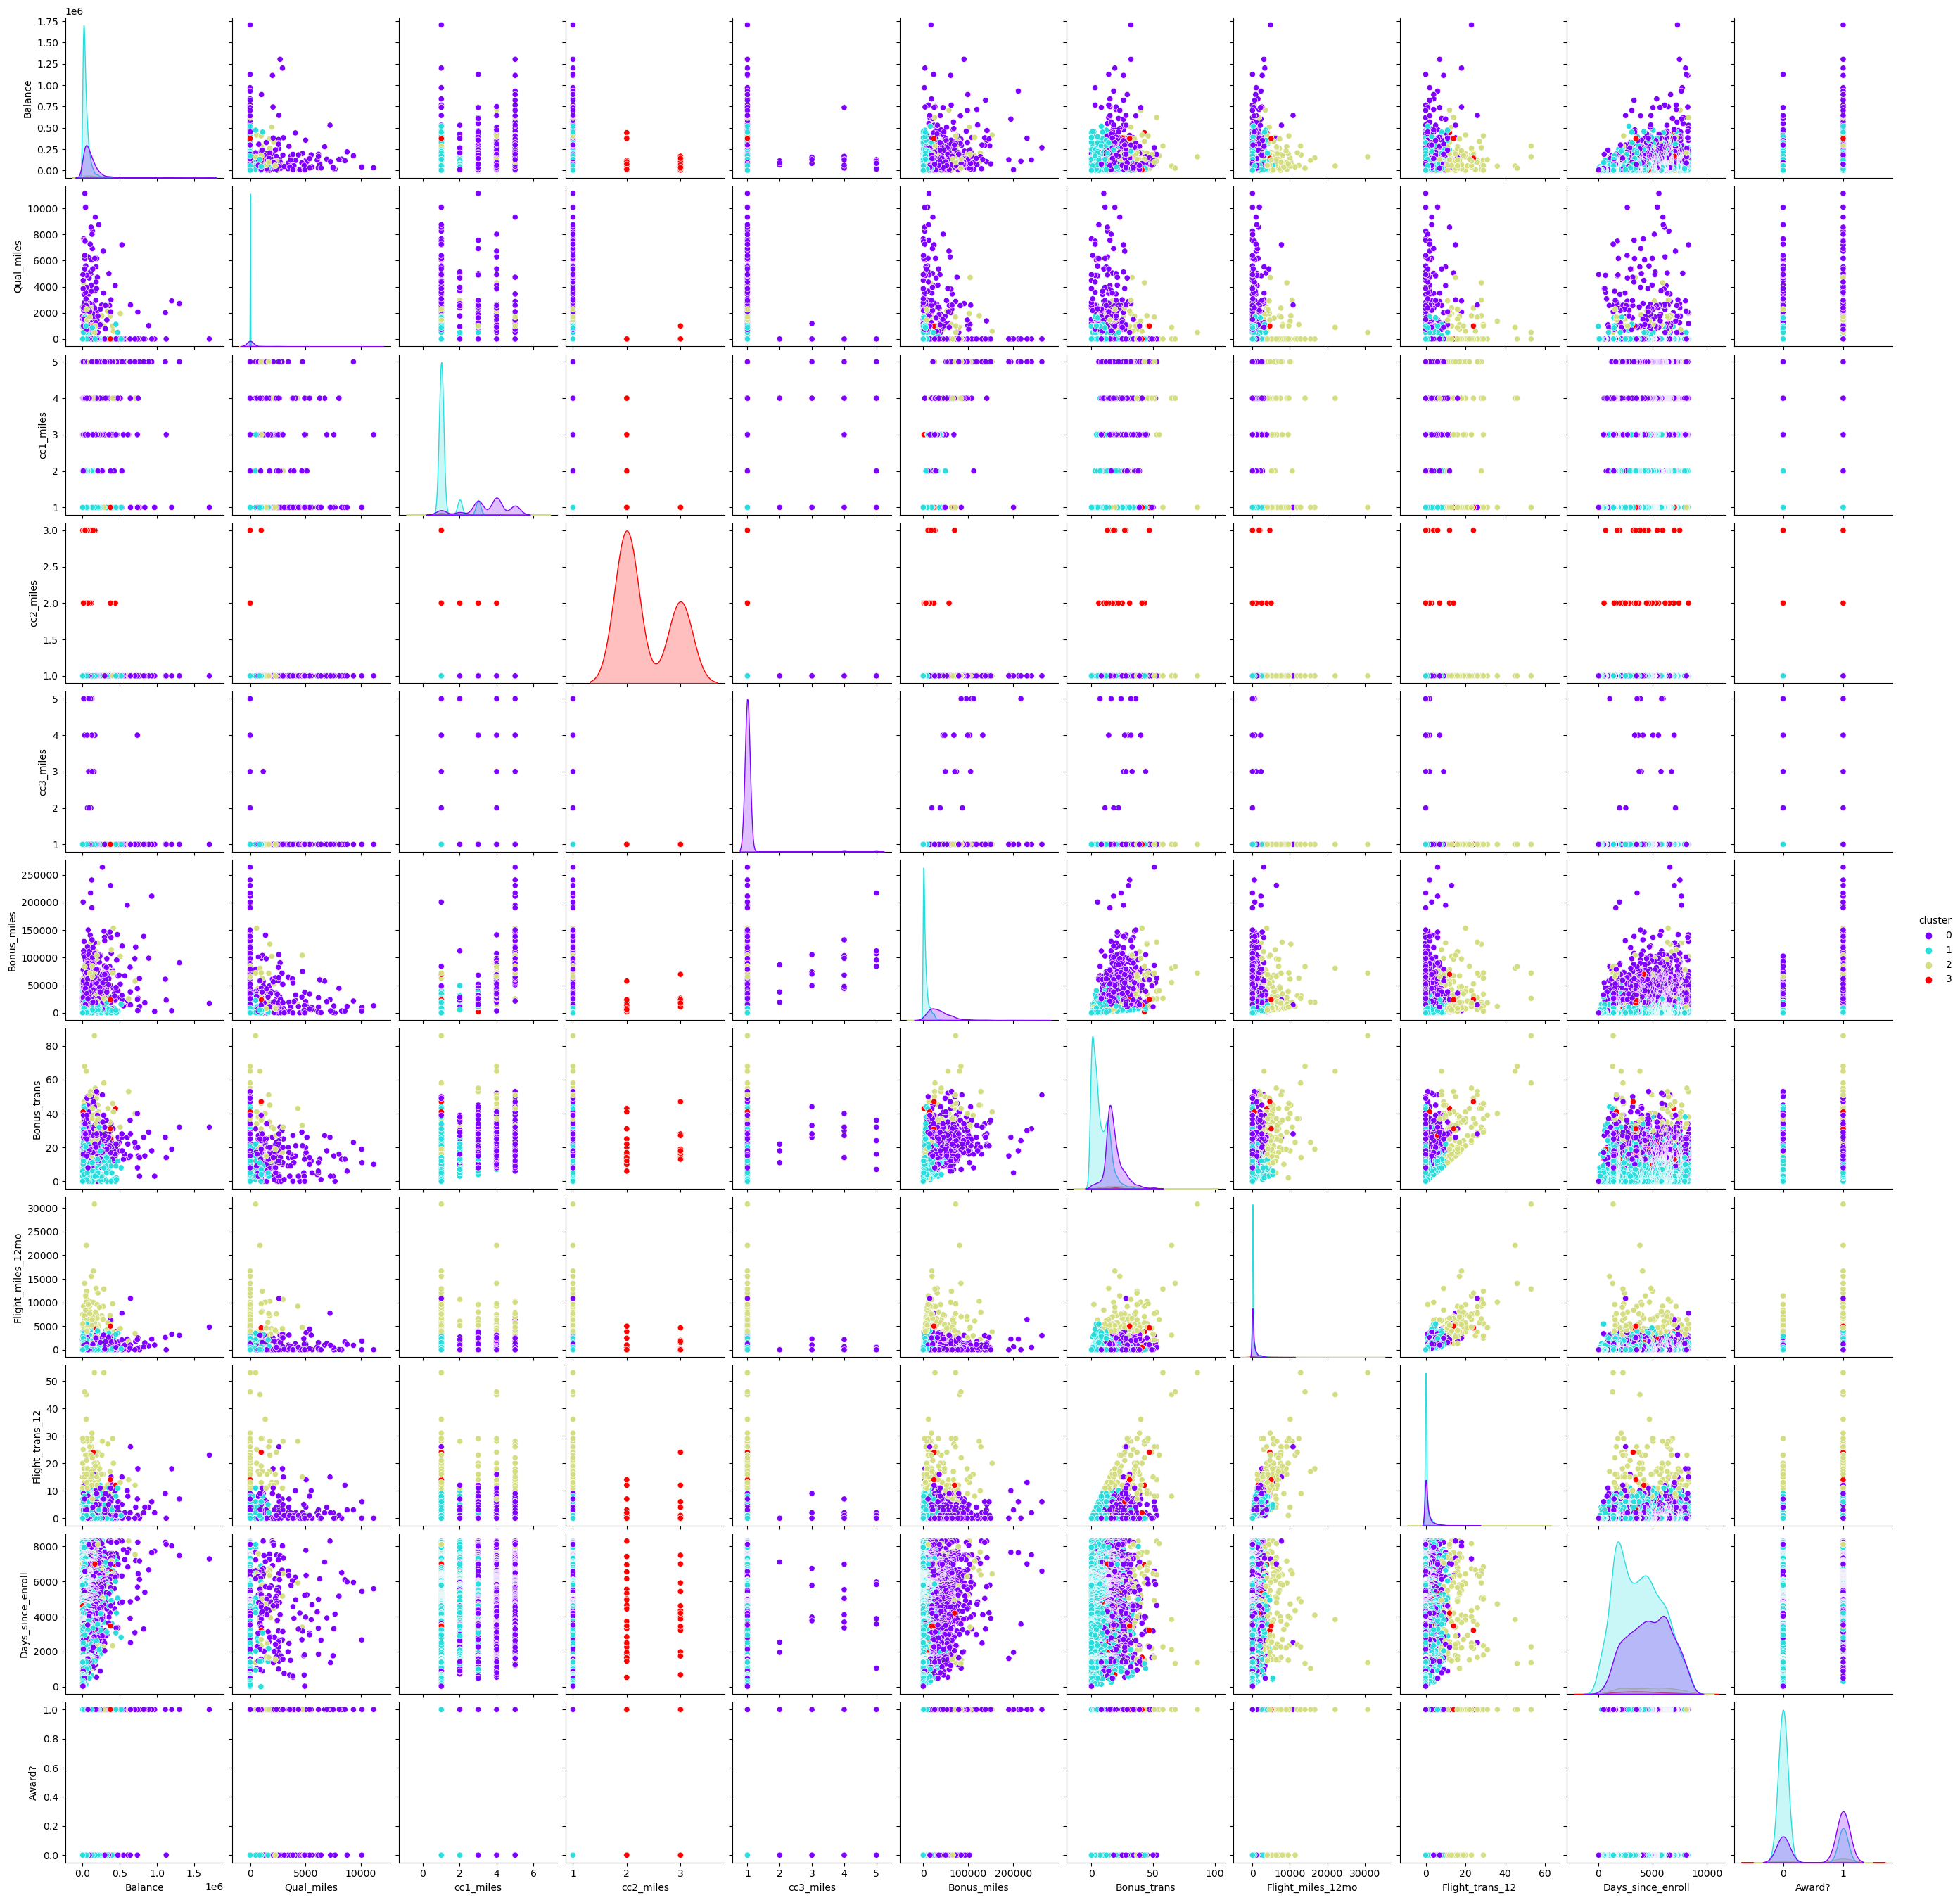

In [24]:
sns.pairplot(df,hue='cluster',palette='rainbow')

In [25]:
df.groupby(by='cluster').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043
1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


<AxesSubplot:xlabel='Balance', ylabel='Bonus_miles'>

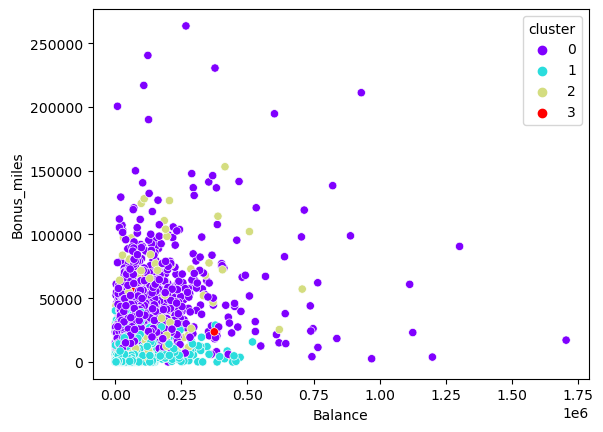

In [27]:
sns.scatterplot(df['Balance'],df['Bonus_miles'],hue=df['cluster'],palette='rainbow')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [38]:

lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       282
           1       0.97      0.97      0.97       479
           2       0.81      0.87      0.84        30
           3       1.00      1.00      1.00         9

    accuracy                           0.95       800
   macro avg       0.93      0.94      0.94       800
weighted avg       0.96      0.95      0.96       800



In [40]:
from sklearn.cluster import KMeans

In [50]:
km=KMeans()
y=km.fit_predict(x)

In [51]:
silhouette_score(x,y)

0.23655403102028674

In [ ]:
wcss=[]
for i in range(2,20):
     km=KMeans(n_clusters=i)
     km.fit_predict(x)
     wcss.append(km.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(range(2,20),wcss)

In [ ]:
km=KMeans(n_clusters=6)
y=km.fit_predict(x)

In [ ]:
silhouette_score(x,y)

In [ ]:
df['kcluster']=y

In [ ]:
df.groupby(by='kcluster').mean()

In [ ]:
sns.scatterplot(df['Balance'],df['Bonus_trans'],hue=df['kcluster'],palette='rainbow')

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db=DBSCAN()
y=db.fit_predict(x)
silhouette_score(x,y)

# selecting Min_samples
numbers of columns +1 Number of columns*2++==Number of Dimension +1 always keep min_sample at least 3

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
ne=NearestNeighbors(n_neighbors=3).fit(x)

In [ ]:
d,i=ne.kneighbors(x)
d

In [ ]:
dist=np.sort(d[:,1],axis=0)

In [ ]:
db=DBSCAN(eps=3,min_samples=12)

In [ ]:
y=db.fit_predict(x)

In [ ]:
silhouette_score(x,y)

In [ ]:
df['DBpred']=y
df

In [ ]:
df.groupby(by='DBpred').mean()

In [ ]:
df.drop(columns=['cluster','kcluster'],inplace=True)

In [ ]:
sns.pairplot(df,hue='DBpred',palette='rainbow')